<a href="https://colab.research.google.com/github/Zahraa28/-Random-Forest-Model/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
 # Import libraries
 import pickle
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 from imblearn.over_sampling import RandomOverSampler
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.impute import SimpleImputer
 from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
 )
 from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
 from sklearn.pipeline import make_pipeline
 df = pd.read_csv('cancer.csv')
 df.dropna(axis=0, how='any')
 df.head(10)

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [91]:
df.columns

Index(['diagnosis(1=m, 0=b)', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
 # Create my feature matrix X and target vector y.iagno
 target = "diagnosis(1=m, 0=b)"
 X = df.drop(columns=target)
 y = df[target]

In [96]:
 # Divide my data
 X_train,X_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,  random_state = 42)
 print("X_train shape:", X_train.shape)
 print("y_train shape:", y_train.shape)
 print("X_test shape:", X_test.shape)
 print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


In [97]:
over_sample = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sample.fit_resample(X_train, y_train)
print("X_train over Shape =", X_train_over.shape)
X_train_over.head()

X_train over Shape = (572, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [98]:
acc_baseline = X_train_over.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.0087


In [99]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [100]:
cv_scores = cross_val_score(
    clf,
    X_train_over,
    y_train_over,
    cv=7
)
print(cv_scores)

[0.97560976 0.97560976 0.97560976 0.97560976 1.         0.98765432
 0.97530864]


In [101]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators" : range(5,50,5),
    "randomforestclassifier__max_depth" : range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(5, 50, 5),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [102]:
model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(5, 50, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [103]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(5, 50, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [104]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030448,0.002454,0.005977,0.000474,10,5,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.939130,0.965217,0.947368,0.964912,0.973684,0.958063,0.012767,65
1,0.039184,0.003614,0.007151,0.002657,10,5,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.939130,0.965217,0.947368,0.964912,0.973684,0.958063,0.012767,65
2,0.047504,0.002828,0.006772,0.001595,10,10,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.965217,0.982609,0.956140,0.991228,0.991228,0.977285,0.014212,25
3,0.049082,0.003797,0.005607,0.000260,10,10,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.965217,0.982609,0.956140,0.991228,0.991228,0.977285,0.014212,25
4,0.061328,0.001983,0.006772,0.001398,10,15,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973913,0.991304,0.956140,1.000000,0.982456,0.980763,0.015081,1


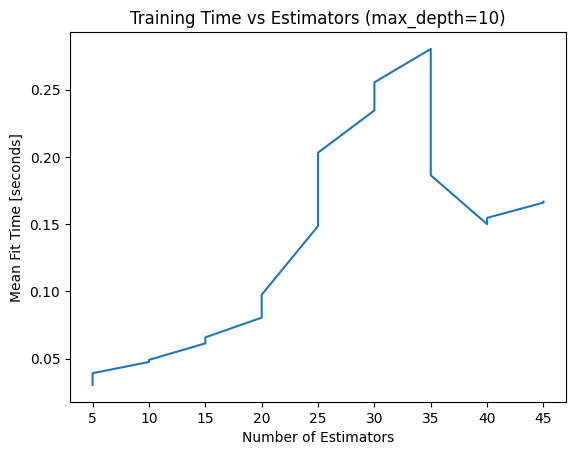

In [105]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

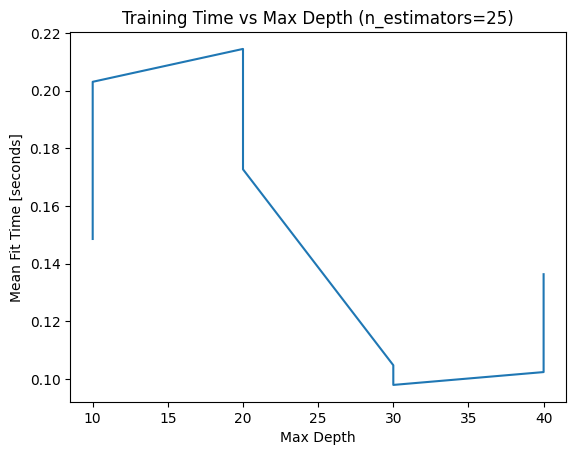

In [106]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [107]:
best_model =  model.predict(X_test)

In [108]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test,y_test)
print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9561


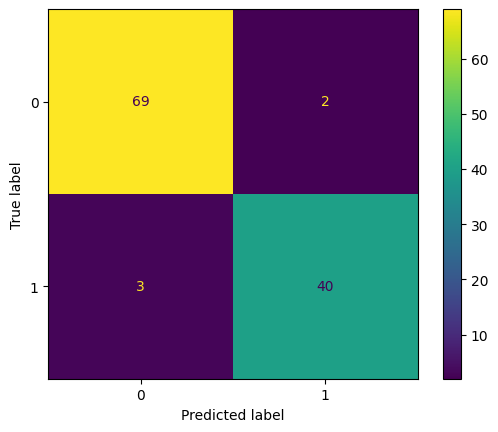

In [109]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [110]:
class_report = classification_report(y_test,model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

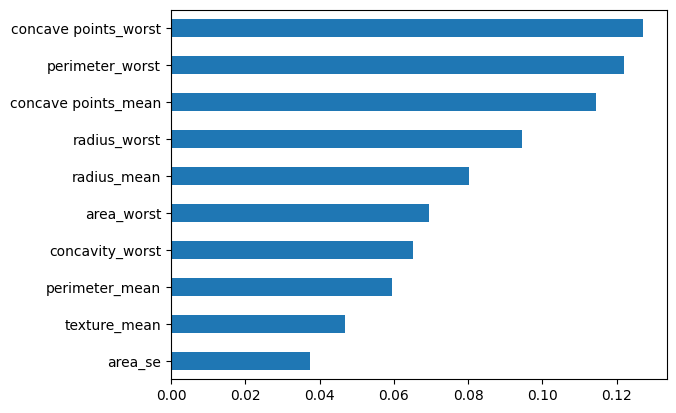

In [111]:
features = X_train_over.columns
importances = model.best_estimator_.named_steps[
    "randomforestclassifier"
].feature_importances_
feat_imp =pd.Series(importances, index = features).sort_values()
feat_imp.tail(10).plot(kind="barh")

In [115]:
with open("AI model","wb") as f:
  pickle.dump(model , f)

with open("AI model", "rb") as f:
    loaded_model = pickle.load(f)
print(loaded_model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(5, 50, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)
